# Safest Neighborhood Final Notebook

In [114]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# Introduction

Our task was to find the best Pittsburgh neighborhood in terms of safety.
We searched for data which regarded how safe each neighborhood was, and we compared them against each other. The more dangerous events the neighborhood had, the more unsafe it was. In regards to the data, we also made sure the datasets included the neighborhood names, relevant data to our main topic, and data which is easily feasible. 

We based our main metric on the three submetrics we came up with. Which is how we solidified our datasets and used them to create our dataframs. 

# The Metric
Our group covered metrics which regarded the safety of each neighborhood in Pittsburgh. The submetrics included are fires in the area, firearm seizures, and arrest data. 

In order to determine the safest neighborhood, the metric we will use is the "danger index". This will be the sum of all our data combined into one dataframe. The safest neighborhood will be the one with the lowest danger index.

# Fire Data Frames

One thing you have to know about fires: they're *very* unsafe. What better choice for our first dataframe, then, but fire incident statistics? Below, we load in data from the last several years of fire incidents in Pittsburgh. As you can see, there's a lot of data here!

In [115]:
firedata = pd.read_csv("firedata.csv") 
firedata.groupby("neighborhood").count()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,56,55,56,56,55,56,56,55,56,56,56,56,56,56,56,53,53
Allegheny West,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,38,38
Allentown,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,112,112
Arlington,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
Arlington Heights,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
West End,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
West Oakland,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57


Let's make this easier to look at. We used the value_counts function to create a series. Since each row is its own fire incident, we group the series by neighborhood and simply take the number of rows that contain each neighborhood name. Much better.

In [116]:
# Get the value counts (number of entries) per each neighborhood. From here we can see that there are 
# 91 neighborhoods considered by the dataset.

fire_series = firedata["neighborhood"].value_counts()

fire_series

Carrick                      262
Squirrel Hill South          233
Central Business District    232
South Side Flats             225
Hazelwood                    217
                            ... 
St. Clair                     11
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  7
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

That's a lot of neighborhoods to contend with. Maybe we just want to see where the highest number of fire incidents are. With this new, filtered series, we can take a closer look at the more hazardous communities to live in for fire incidents. Carrick is, by this metric, the most dangerous neighborhood. 

In [117]:
# show only the highest incidents of fire

fire_series_filtered = fire_series.iloc[:int(fire_series.size / 2)]
fire_series_filtered.head(15)

Carrick                      262
Squirrel Hill South          233
Central Business District    232
South Side Flats             225
Hazelwood                    217
East Liberty                 188
Mount Washington             183
Lincoln-Lemington-Belmar     177
Homewood South               174
Homewood North               171
Brookline                    163
Shadyside                    157
Sheraden                     156
Knoxville                    156
Perry South                  151
Name: neighborhood, dtype: int64

Plotting this data, it's easy to see the difference between each neighborhood. Don't move to Carrick if you're flammable! It's worth noting, of course, that neighborhoods with greater area are more likely to contain more fire incidents. For our purposes, though, we will look at just the raw numbers.

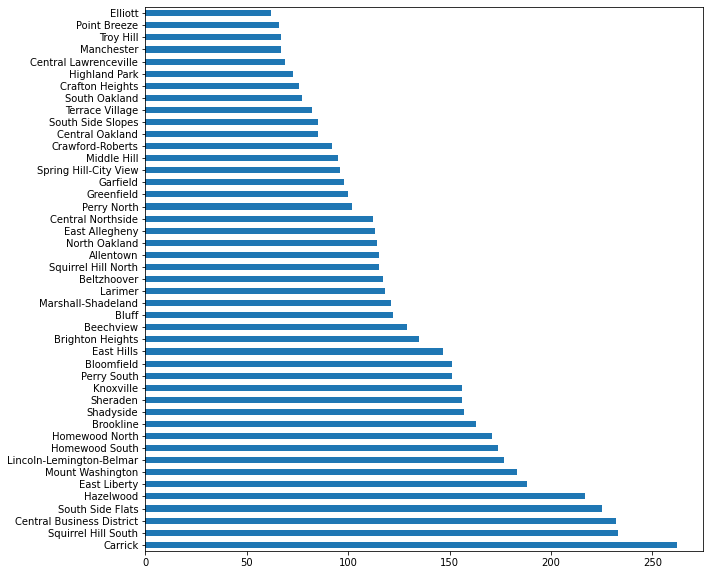

In [118]:
# plotted data
fire_series_filtered.plot(kind="barh",figsize=(10,10))

# Firearm Seizures Data

In [119]:
data = pd.read_csv('Firearms.csv',index_col = 'address',parse_dates = True)
data.head(5)

,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
address,,,,,,,,,,,,,,,,,,
"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


Read in the firearms file which contains all of the data.
Then I displayed the first five columns of data using the .head() method.
As you see the data contains the total amount of firearms per street. These totals can easily be grouped by neighborhood using .groupby('neighborhood')
Also this data is up to date as it spans from 2015 to 2022.

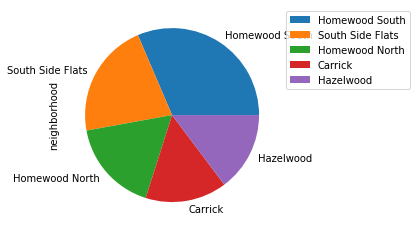

In [120]:
data['neighborhood'].value_counts().sort_values(ascending=False).head().plot(kind = 'pie')
plt.legend(bbox_to_anchor=(1,1))

I then used .value_counts() to see which street has had the most instances and graphed the top five. Using a pie chart is much cleaner and does not take up as much space as bar charts. I also put the legend in the top right had corner listing the street names.

As you can see, Homewood South has had the most cases.

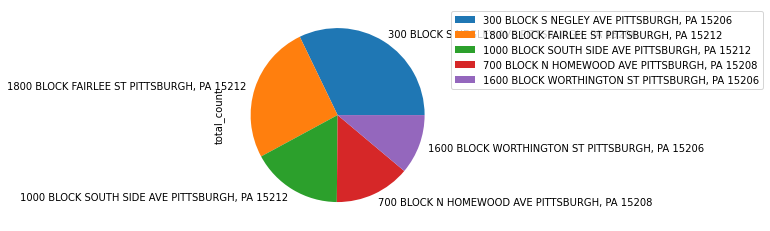

In [121]:
data['total_count'].sort_values(ascending = False).head().plot(kind='pie')
plt.legend(bbox_to_anchor=(1,1))

I then found the neighborhoods with the most firearms seized by using sort_values() and aiming towards the 'total_count' row. 
I then plotted it using a pie chart and put the list of the street names at the top right hand corner.
Listing the top five made the pie chart much easier to read.

In [122]:
print('Total amount of pistols reported:', data['pistol_count'].sum())
print('Total amount of rifles reported:', data['rifle_count'].sum())

Total amount of pistols reported: 3899
Total amount of rifles reported: 384


Code which displayes the total amount of pistols and rifles seized by police. Used print commands, the .sum() function, and I indexed the rows 'pistol_count' and 'rifle_count'. 
The .sum() function is useful in cases like these as it eliminates the use of dictionaries and for loops to iterate through the Dataframe.

In [123]:
totals = data.groupby("neighborhood").sum()['total_count']
totals.sort_values(ascending=True).head()

neighborhood
Mt. Oliver        3
Regent Square     3
Swisshelm Park    3
Summer Hill       3
Oakwood           4
Name: total_count, dtype: int64

The .groupby method then creates a new dataframe centered around the row 'neighborhood' in order to get the total amount of firearms seized in each neighborhood. The .sum() function is also utilized to sum the amount of firearms seized in each neighborhood.

Then, I displayed the top five neighborhoods with the least amount of firearms seized. There was a tie between four different neighborhoods.
Mount Oliver, Regent Square, Swisshelm Park, and Summer Hill were my top four neighborhoods in my submetric.

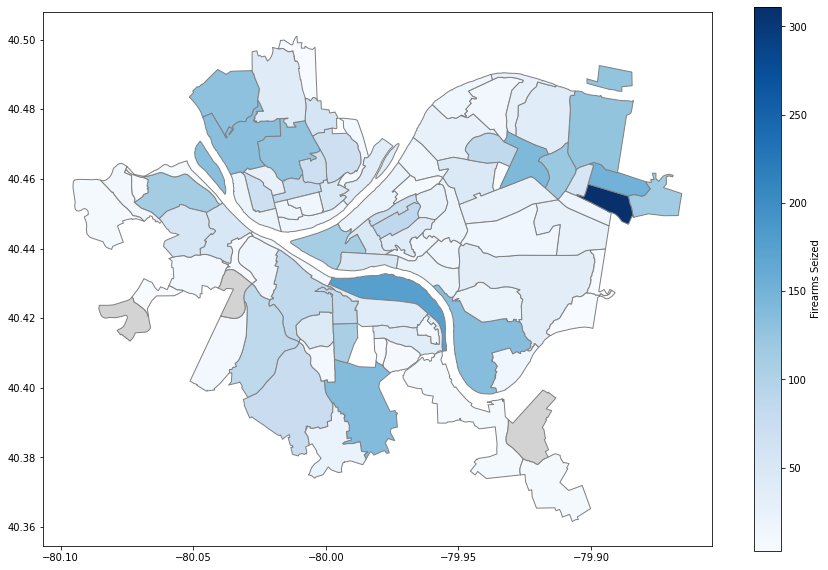

In [124]:
firearm_map = neighborhoods.merge(totals, how='left', left_on='hood', right_on='neighborhood')
firearm_map.plot(column='total_count', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="grey",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Firearms Seized"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data as lightgrey
               )

Now using geopandas, I merged the dataset which was grouped by neighborhoods and the neighborhoods shape file. This will allow for the graphing of my data. When performing the merge I made sure that the indices lined up with the proper rows, or the rows which contained the neighborhood names. Then I graphed it using a blue theme.

# Firearm Conclusion:
Based on my data analysis, I conclude that the safest neighborhood is Mount Oliver as it had the least amount of firearms seizures. Even though there was a tie between Mount Oliver and three other neighborhoods, I decided to go with Mount Oliver as it appeared at the top of the list. 

However, this does not complete our anaylsis as the next dataset will look at the total amount of arrests in each neighborhood.

# Arrest Data

First, read in the arrest data from the "arrest_data.csv" file. This contains all sorts of data including arrest location, arrest street, incident neighborhood, etc. 

In [125]:
arrest_data = pd.read_csv("arrest_data.csv")
arrest_data.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


Then I converted the entirety of the .csv file into a series containing only the neighborhoods its arrests. This allows me to more easily manipulate the data and analyze as well. 

In [155]:
arrest_series = arrest_data["INCIDENTNEIGHBORHOOD"].value_counts()
arrest_series

Central Business District    3315
South Side Flats             2843
Carrick                      1960
East Allegheny               1773
Homewood South               1744
                             ... 
Regent Square                  28
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

Below is a graph of Pittsburgh neighborhoods and the amount of crimes committed in them.

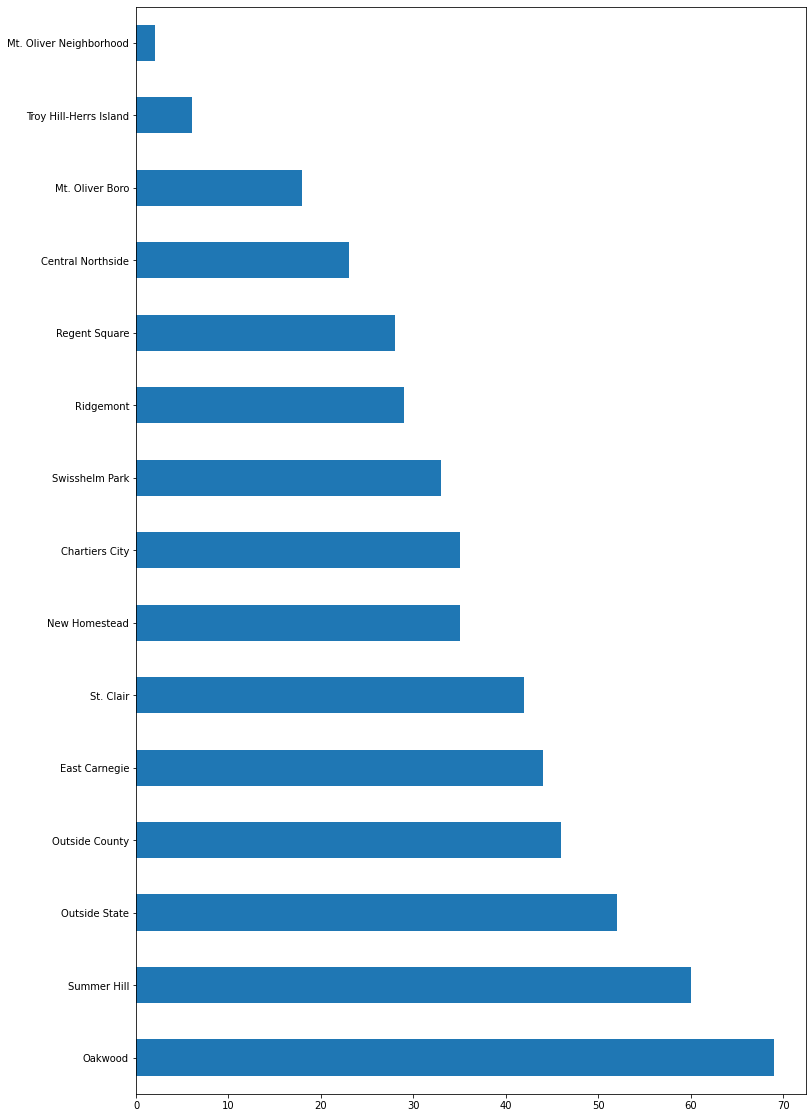

In [156]:
#Now that we have a dictionary where the keys are the neighborhoods, plot the data
arrest_series.tail(15).plot(kind="barh",figsize=(12,20))

However, amount of arrests is not entirely indicative of if a neighborhood is safe or not. A neighborhood could have lots of arrests/incidents, but also lots of population. The same could be said for a neighborhood that has little arrests but also little population. 

So, I loaded in a population data sheet of each neighborhood and turned it into a series in order to find the arrest:population ratio in each neighborhood. 

In [163]:
population_data = pd.read_csv("population_data.csv", index_col = 'Neighborhood')
population_series = population_data["2020_Total_Population"]

I then divided the arrest series by the population series and that resulted in a a series of arrest:population ratios for each neighborhood. I filtered out the NaNs (may have resulted in some neighborhoods missing in both data sheets) and plotted the graph. The lower the ratio, the safer to neighborhood. 

In [164]:
#iterate through each neighborhood and get population data, as well as calculate ratio data
     
find_ratio = arrest_series/population_series
fill_ratio = find_ratio.fillna(0)

arrest_query = fill_ratio > 0.0
arrest_ratio = fill_ratio[arrest_query]



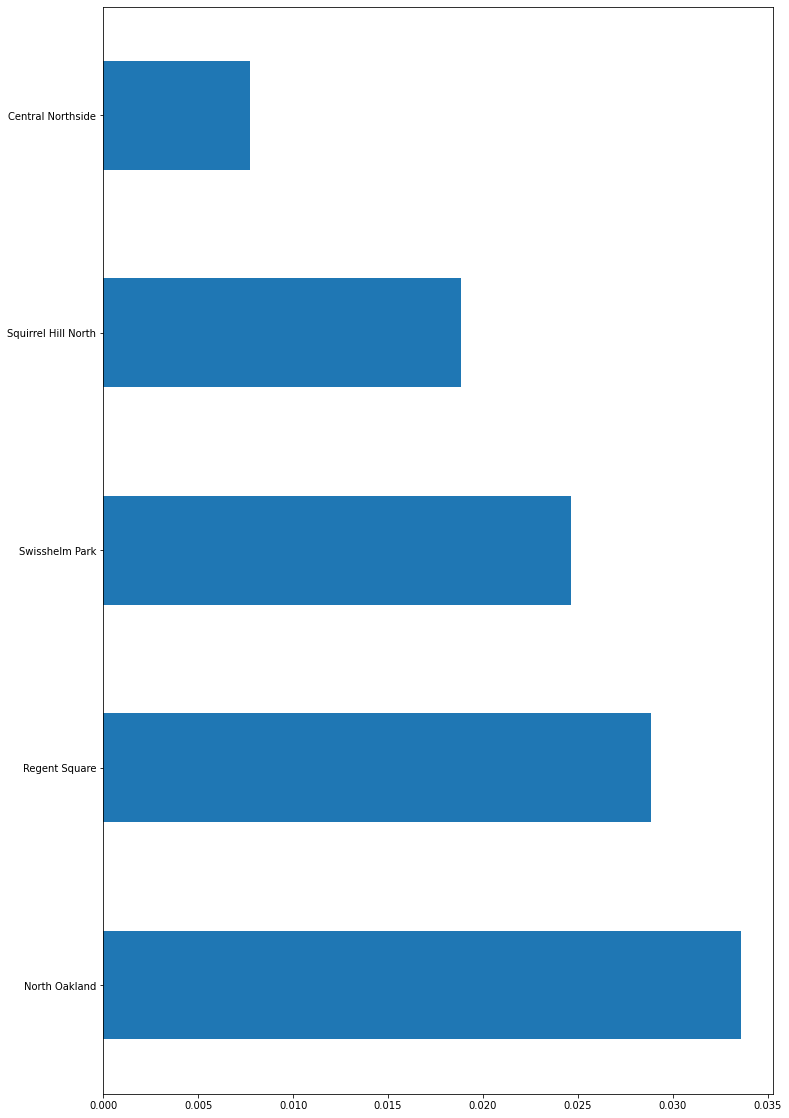

In [167]:
arrest_ratio.sort_values(ascending=False).tail(5).plot(kind="barh",figsize=(12,20))

# Arrest Data Conclusion
According to the data, Central Northside has the lowest ratio, meaning it is safest in terms of crimes. However, keep an eye out for Regent Square, as it will come up in our conclusion. 

# Combining the Data

In order to determine the safest neighborhood, we must combine the data we analyzed. To do this, we had to format our data in a way that it can be computed easily. We decided to make everything a series.

In [147]:
firearm_series = pd.Series(data.groupby('neighborhood').sum()['total_count'])
firearm_series.sort_values(ascending = True)
dictionary_data = dict()
firearm_series

neighborhood
Allegheny Center       15
Allegheny West         17
Allentown              86
Arlington              39
Arlington Heights      10
                       ..
Upper Lawrenceville    14
West End                5
West Oakland           14
Westwood               10
Windgap                13
Name: total_count, Length: 88, dtype: int64

After ensuring everything is a series, we added all of them together into a combined_series and turned that into a dataframe. This will contain a sum of firearm seizures, amount of fires, and arrests of each neighborhood; we labeled this value the "danger index". The lower the danger index, the safer it is. 

In [173]:
combined_series = fire_series + firearm_series + arrest_ratio

combined_dataframe = pd.DataFrame(combined_series).reset_index()
# rename column [index -> neighborhood] & [0 -> rank]
combined_dataframe.rename(columns = {'index':'neighborhood', 0:'rank'}, inplace = True)


To visualize our data, we plotted it on a geopandas graph to show where and which neighborhoods are safe. The lighter the area, the lower the danger index, and the more safe it is. 

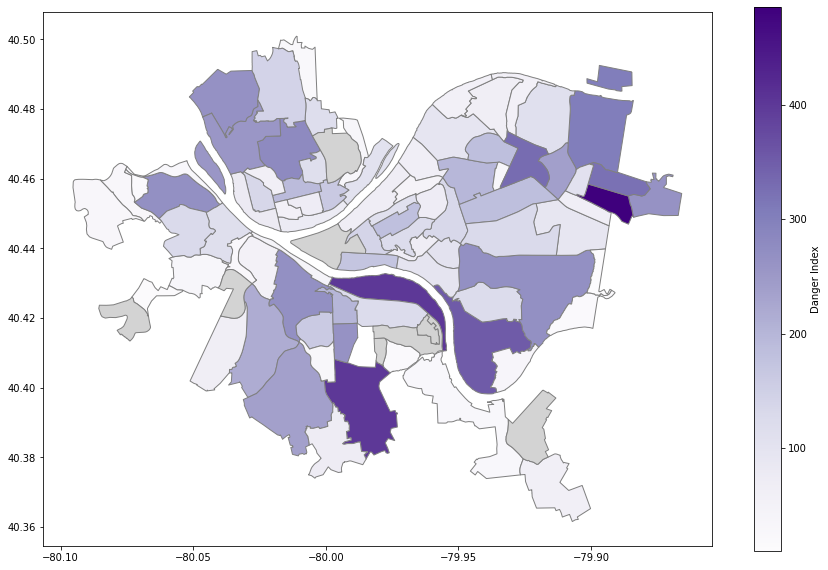

In [174]:
final_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
safety_map = final_map.merge(combined_dataframe, how='left', left_on='hood', right_on = 'neighborhood')
safety_map.plot(column="rank", # set the data to be used for coloring
               cmap='Purples',              # choose a color palette
               edgecolor="grey",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Danger Index"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data as lightgrey
               )

Below is the top 5 safest neighborhoods in Pittsburgh. As you can see, Regent Square is at the top with a danger index of 10.029, meaning it is the safest neighborhood in Pittsburgh. 

In [175]:
combined_dataframe.sort_values(['rank'], ascending = True).head()

,neighborhood,rank
66,Regent Square,10.028836
59,Oakwood,17.067317
82,Swisshelm Park,18.024645
20,Chartiers City,18.071138
78,St. Clair,18.229508


James: The "best" neighborhood by the safe metric is Regent Square! I was pretty surprised by the results, especially for my metric in particular (fire incidents). I did not realize how often fires are an issue in a city like this, coming from a small town myself. I was mostly shocked that the neighborhoods around Downtown were not much more dangerous. All and all, I know that if I'm highly flammable, I won't move to Carrick, and that the best place to be is probably on the North side. 

Victor: After analyzing the results of arrest data in Pittsburgh neighborhoods, I narrowed down the safest neighborhoods in Pittsburgh. Although Regent Square did not have the lowest arrest rate, it was among the top 5 safest neighborhoods with an arrests to population ratio of 0.029. Because of the low arrest rate, the neighborhood must be one of the safest. This data combined with firearm seizures and fires reinforce this idea as Regent Square ended up with the lowest Danger Index, making it the safest neighborhood in Pittsburgh. 

Luke: The "best" neighborhood is Regent Square based on our map and combined data. After working through my own submetric which was firearms seized, I thought the safest neighborhood would be the one with the least amount of gun violence. However, that proved to be incorrect as there are a multitude of factors that go into finding the "safest neighborhood". Although orginally I thought the safest neighborhood was Mt. Oliver as it had the least amount of firearm seizures, Regent Square had the least amount of dangerous factors overall. 